In [2]:
from IPython.display import Image
import ast

In [3]:
ast.parse

<function ast.parse(source, filename='<unknown>', mode='exec')>

In [4]:
ast.parse("x=42")

In [5]:
ast.dump(ast.parse('x=42'))

"Module(body=[Assign(targets=[Name(id='x', ctx=Store())], value=Num(n=42))])"

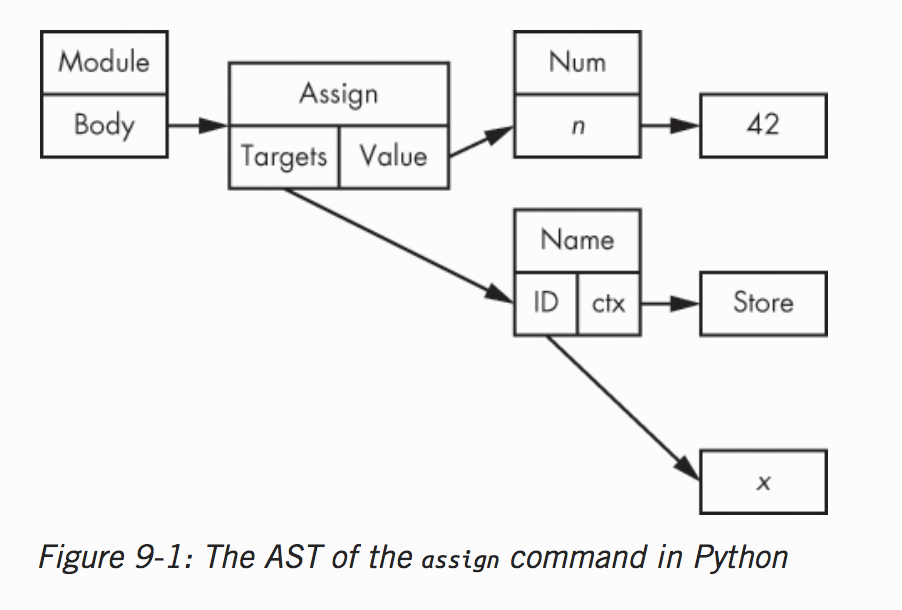

In [6]:
Image(filename="/Users/michael/Python/Book/SeriousPython/Fig9-1.png", height=50)

In [7]:
compile(ast.parse("x=42"), '<input>', 'exec')

<code object <module> at 0x111598300, file "<input>", line 1>

In [8]:
eval(compile(ast.parse("x=42"), '<input>', 'exec'))

In [9]:
x

42

In [10]:
hello_world = ast.Str(s='hello world!', lineno=1, col_offset=1)
print_name = ast.Name(id='print', ctx=ast.Load(), lineno=1, col_offset=1)
print_call = ast.Call(func=print_name, ctx=ast.Load(), args=[hello_world], keywords=[], lineno=1, col_offset=1)
module = ast.Module(body=[ast.Expr(print_call, lineno=1, col_offset=1)], lineno=1, col_offset=1)

In [11]:
code = compile(module, '', 'exec')

In [12]:
eval(code)

hello world!


In [20]:
class ReplaceBinOp(ast.NodeTransformer):
    """Replace operation by addition in binary operation"""
    def visit_BinOp(self, node):
        return ast.BinOp(left=node.left, op=ast.Add(), right=node.right)
    
tree = ast.parse("x = 1/3")
ast.fix_missing_locations(tree)
print(ast.dump(tree))

Module(body=[Assign(targets=[Name(id='x', ctx=Store())], value=BinOp(left=Num(n=1), op=Div(), right=Num(n=3)))])


In [19]:
eval(compile(tree, '', 'exec'))
print(x)

0.3333333333333333


In [15]:
tree = ReplaceBinOp().visit(tree)
ast.fix_missing_locations(tree)
print(ast.dump(tree))

Module(body=[Assign(targets=[Name(id='x', ctx=Store())], value=BinOp(left=Num(n=1), op=Add(), right=Num(n=3)))])


In [16]:
eval(compile(tree, '', 'exec'))
print(x)

4


NameError: name 'Module' is not defined